1


SystemExit: 

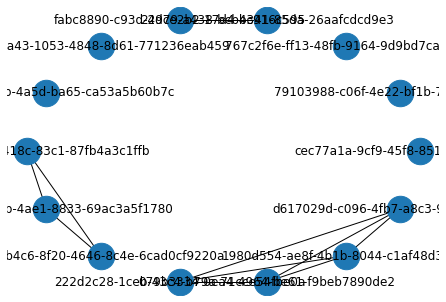

In [15]:
import json
from pymongo import MongoClient
import sys
import networkx as nx
import matplotlib.pyplot as plt

def familyPresent(keys):
    for i in keys:
        if (i == "famiglie"):
            return True
    return False

def generateFamilyClique(fam):
    fam_graph = nx.Graph()
    for mem in fam["members"]:
        fam_graph.add_node(mem["uuid"])
    from itertools import product
    for node in list(fam_graph.nodes()):
        for node_2 in list(fam_graph.nodes()):
            pass
            #fam_graph.add_edge(node,node_2)
    #print(fam_graph)
    G = (nx.complete_graph(list(fam_graph.nodes())))
    #fam_graph.add_edges_from()
    return G

client = MongoClient('localhost', 27017)
db = client['tesi']
db_famiglie = db['famiglie']
db_sezioni = db['sezioni']
db_lavoro = db['lavoro']

graph = nx.Graph()
l = []
for i in list(db_sezioni.find()):
    print(i["properties"]["SEZ"])
    if (familyPresent(i.keys()) == True):
        for fam in i["famiglie"]:
            graph = nx.compose(graph, generateFamilyClique(fam))
        
    pos = nx.circular_layout(graph)
    nx.draw(graph, pos, with_labels=True, arrows=True, node_size=700)
    sys.exit()